In [3]:
import matplotlib.pyplot as plt
import numpy as np
import csv

importing pilot study data

In [29]:
neat_data_pilot = np.zeros(40)
dqn_data_pilot = np.zeros(40)


with open("experiment_data/pilot_study/NEAT_pilot_study_data.csv", "r") as file:
    reader = csv.reader(file)
    for i, row in enumerate(reader):
        neat_data_pilot[i] = row[0]
        
with open("experiment_data/pilot_study/DQN_pilot_study_data.csv", "r") as file:
    reader = csv.reader(file)
    for i, row in enumerate(reader):
        dqn_data_pilot[i] = row[0]


57048.44631854031 704.5573428579111


In [36]:
dqn_minus_neat = np.zeros(40)
with open("experiment_data/pilot_study/DQN_minus_NEAT_pilot_study_data.csv", "w", newline="") as file:
    writer = csv.writer(file)
    for i, value in enumerate(dqn_data_pilot - neat_data_pilot):
        writer.writerow([value])
        dqn_minus_neat[i] = value
        
s = np.std(dqn_minus_neat)
e = 10_000
(1.96**2)*(s**2)/(e**2)


124.21858770646858

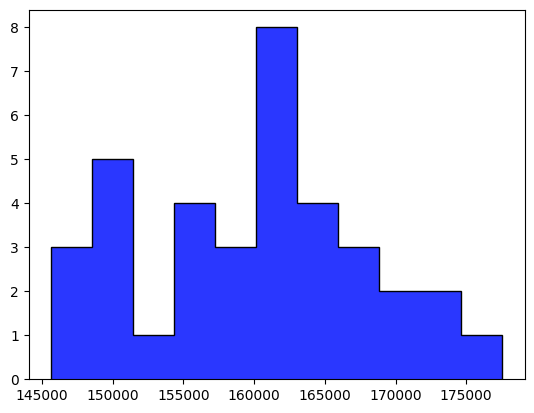

In [27]:
dqn_minus_neat_no_outlaiers = dqn_minus_neat[dqn_minus_neat>130_000]
plt.hist(dqn_minus_neat_no_outlaiers, 11, color="#2a37ff")
plt.hist(dqn_minus_neat_no_outlaiers, 11, histtype="step", color="#000000")
plt.show()



importing study data

In [136]:
neat_data = np.zeros(125)
dqn_data = np.zeros(125)
y_axis = np.arange(1,126)

with open("experiment_data/study/NEAT_study_data.csv", "r") as file:
    reader = csv.reader(file)
    for i, row in enumerate(reader):
        neat_data[i] = row[0]
        
with open("experiment_data/study/DQN_study_data.csv", "r") as file:
    reader = csv.reader(file)
    for i, row in enumerate(reader):
        dqn_data[i] = row[0]

paired_data = -dqn_data+neat_data
print("mean DQN:", np.mean(dqn_data), "mean NEAT:", np.mean(neat_data), "mean paired:", np.mean(neat_data-dqn_data))
print("std DQN:", np.std(dqn_data), "std NEAT:", np.std(neat_data),"std paired", np.std(neat_data-dqn_data))

print("NEAT: q1, q2, q3", np.quantile(neat_data, [0.25, 0.5, 0.75]))
print("DQN: q1, q2, q3", np.quantile(dqn_data, [0.25, 0.5, 0.75]))
print("Paired: q1, q2, q3", np.quantile(paired_data, [0.25, 0.5, 0.75]))

    

mean DQN: 321829.352 mean NEAT: 170609.696 mean paired: -151219.656
std DQN: 45975.60726372297 std NEAT: 712.8117083662416 std paired 46040.60495764216
NEAT: q1, q2, q3 [170142. 170477. 170951.]
DQN: q1, q2, q3 [326144. 330743. 336000.]
Paired: q1, q2, q3 [-166005. -159873. -155921.]


making conf. interval

In [137]:
upper_lim = np.mean(paired_data) + 1.96*np.std(paired_data)/np.sqrt(125)
lower_lim = np.mean(paired_data) - 1.96*np.std(paired_data)/np.sqrt(125)

print(f"[{upper_lim}, {lower_lim}]")
np.std(paired_data)

[-143148.38208301665, -159290.92991698332]


46040.60495764216

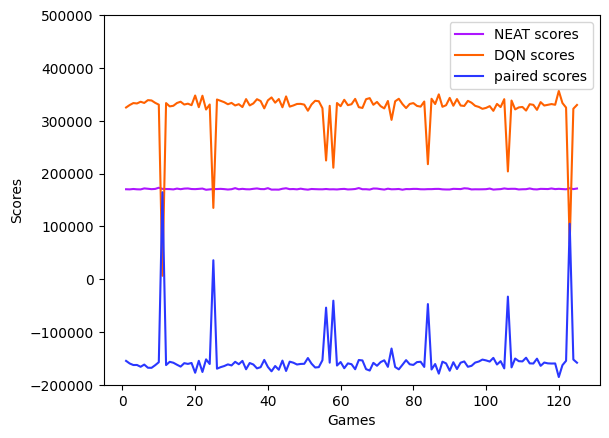

In [97]:
plt.plot(y_axis, neat_data, label = "NEAT scores", color="#ad15ff")
plt.plot(y_axis,dqn_data, label = "DQN scores", color="#ff6100")
plt.plot(y_axis,-dqn_data+neat_data, label = "paired scores", color="#2a37ff")
plt.ylim(-200_000, 500_000)
plt.ylabel('Scores')
plt.xlabel('Games')

plt.legend(loc=1)
plt.show()

making boxplots

{'whiskers': [<matplotlib.lines.Line2D at 0x29f7e12c5d0>,
 'caps': [<matplotlib.lines.Line2D at 0x29f7e12e250>,
 'boxes': [<matplotlib.patches.PathPatch at 0x29f78d3e150>],
 'medians': [<matplotlib.lines.Line2D at 0x29f7e12db90>],
 'fliers': [],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x29f7e0b5a90>,
 'caps': [<matplotlib.lines.Line2D at 0x29f7e0b7910>,
 'boxes': [<matplotlib.patches.PathPatch at 0x29f7e0b6550>],
 'medians': [<matplotlib.lines.Line2D at 0x29f7e010350>],
 'fliers': [],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x29f7e11df90>,
 'caps': [<matplotlib.lines.Line2D at 0x29f7e11ed90>,
 'boxes': [<matplotlib.patches.PathPatch at 0x29f7e06dc90>],
 'medians': [<matplotlib.lines.Line2D at 0x29f7e11c5d0>],
 'fliers': [],
 'means': []}

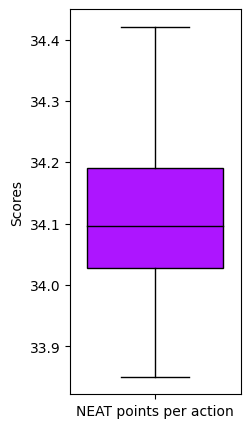

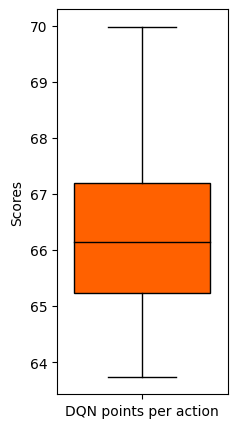

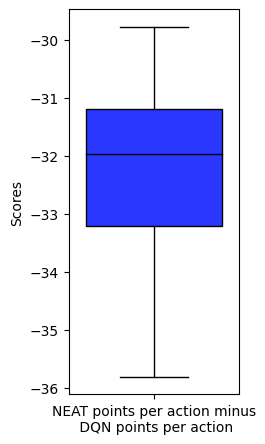

In [140]:
all_data = [neat_data/5000,dqn_data/5000,(-dqn_data+neat_data)/5000]
labels = [["NEAT points per action"], ["DQN points per action"], ["NEAT points per action minus\n DQN points per action"]]
colors = ["#ad15ff", "#ff6100", "#2a37ff"]
for i in range(3):
    plt.figure(figsize=(2.2,5))
    #plt.ylim(np.mean(all_data[i])-10_000, np.mean(all_data[i])+30_000)
    boxplot = plt.boxplot(all_data[i],
                        vert=True,  # vertical box alignment
                        patch_artist=True,  # fill with color
                        labels=labels[i],
                        showfliers=False,
                        widths=0.8)  # will be used to label x-ticks
    boxplot["boxes"][0].set_facecolor(colors[i])
    boxplot["medians"][0].set_color("#000000")
    plt.ylabel('Scores')
    display(boxplot)

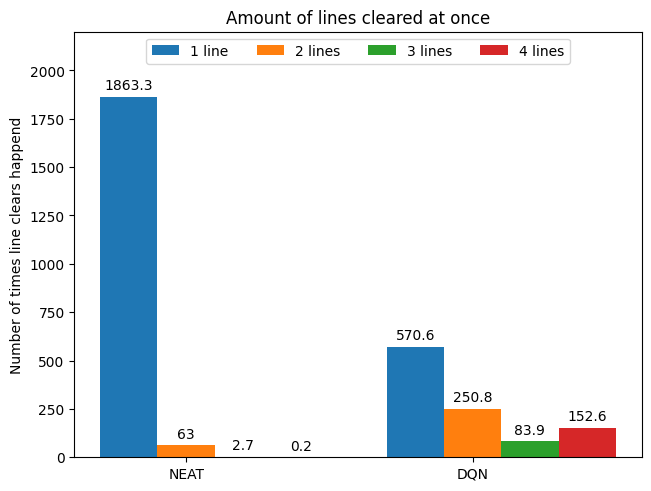

In [168]:

neat_lines_cleared = np.zeros((125, 4))
dqn_lines_cleared = np.zeros((125, 4))
with open("experiment_data/study/NEAT_study_data_lines_cleared.csv", "r") as file:
    reader = csv.reader(file)
    for i, row in enumerate(reader):
        neat_lines_cleared[i,0] = row[0]
        neat_lines_cleared[i,1] = row[1]
        neat_lines_cleared[i,2] = row[2]
        neat_lines_cleared[i,3] = row[3]

with open("experiment_data/study/DQN_study_data_lines_cleared.csv", "r") as file:
    reader = csv.reader(file)
    for i, row in enumerate(reader):
        dqn_lines_cleared[i,0] = row[1]
        dqn_lines_cleared[i,1] = row[2]
        dqn_lines_cleared[i,2] = row[3]
        dqn_lines_cleared[i,3] = row[4]
        

models = ("NEAT", "DQN")
colors = ["#ad15ff", "#ff6100"]
lines_cleared = {
    '1 line': (round(np.sum(neat_lines_cleared[:,0]/125), 1), round(np.sum(dqn_lines_cleared[:,0])/125, 1)),
    '2 lines': (round(np.sum(neat_lines_cleared[:,1]/125), 1), round(np.sum(dqn_lines_cleared[:,1])/125, 1)),
    '3 lines': (round(np.sum(neat_lines_cleared[:,2]/125), 1), round(np.sum(dqn_lines_cleared[:,2])/125, 1)),
    '4 lines': (round(np.sum(neat_lines_cleared[:,3]/125), 1), round(np.sum(dqn_lines_cleared[:,3])/125, 1)),
}
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for i, (attribute, measurement) in enumerate(lines_cleared.items()):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of times line clears happend')
ax.set_title('Amount of lines cleared at once')
ax.set_xticks(x + width, models)
ax.legend(loc='upper center', ncols=4)
ax.set_ylim(0, 2200)

plt.show()
